<h1>Sentiment Analysis project<h1>
<h3>Name student1: Ashiera Preston<h3>
<h3>Name student2: Benito Antonio M.<h3>
<h3>Name student2: Benito Antonio M.<h3>

[nltk_data] Downloading package stopwords to /Users/dbhoo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Printing first 10 rows of customer_review.tsv
   rating       date             variation  \
0       5  31-Jul-18      Charcoal Fabric    
1       5  31-Jul-18      Charcoal Fabric    
2       4  31-Jul-18        Walnut Finish    
3       5  31-Jul-18      Charcoal Fabric    
4       5  31-Jul-18      Charcoal Fabric    
5       5  31-Jul-18  Heather Gray Fabric    
6       3  31-Jul-18     Sandstone Fabric    
7       5  31-Jul-18      Charcoal Fabric    
8       5  30-Jul-18  Heather Gray Fabric    
9       5  30-Jul-18  Heather Gray Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1  
5  I received the echo as a gift. I needed anothe...     

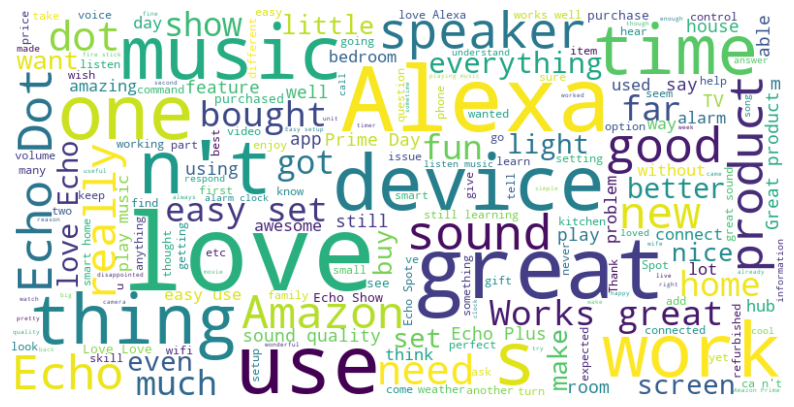

In [13]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense

#Test to see if works
#wregvb





# One-time setup steps
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


#--------Data Wrangling--------
#Step 1: Read the data
file_path = "../dataset/customer_review.tsv"
df = pd.read_csv(file_path, sep='\t')

#Step 2: Print the first 10 lines
print("Printing first 10 rows of customer_review.tsv")
print(df.head(10))

#Step 3: Verify that data does not contain missing values
print("\nChecking for missing values:")
print(df.isnull().sum())

#Step 4: Remove stop words
def remove_stopwords(review):
    # Check if the review is not NaN
    if isinstance(review, str):
        words = nltk.word_tokenize(review)
        filtered_words = [word for word in words if word.lower() not in stop_words]
        return ' '.join(filtered_words)
    else:
        return ''  # Return an empty string for NaN values

df['cleaned_reviews'] = df['verified_reviews'].apply(remove_stopwords)

#Step 5: Generate word cloud
def generate_wordcloud(text):
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(text)

    # Plot the WordCloud image                        
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

cleaned_text = ' '.join(df['cleaned_reviews'].values)
generate_wordcloud(cleaned_text)

#--------Data Engineering--------
#Step 1: Encode target labels (feedback)
label_encoder = LabelEncoder()
df['encoded_labels'] = label_encoder.fit_transform(df['feedback'])

#Step 2: Tokenizing reviews
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['cleaned_reviews'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['cleaned_reviews'])

# Add a new column with the sequences
df['review_sequences'] = sequences


#--------Model Design--------
# Assuming X is the input data (features) with shape (number_of_samples, sequence_length)
embedding_size = 500
lstm_units = 176

model = Sequential()
model.add(Embedding(input_dim=500, output_dim=120, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(units=lstm_units, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()